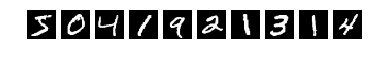

label: [5 0 4 1 9 2 1 3 1 4]


In [1]:
from read_data import read_data
%matplotlib inline
import matplotlib.pyplot as plt

path = 'http://yann.lecun.com/exdb/mnist/'
(train_lbl, train_img) = read_data(
    path + 'train-labels-idx1-ubyte.gz', path + 'train-images-idx3-ubyte.gz')
(val_lbl, val_img) = read_data(
    path + 't10k-labels-idx1-ubyte.gz', path + 't10k-images-idx3-ubyte.gz')

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_img[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('label: %s' % (train_lbl[0:10],))

In [2]:
import numpy as np
import mxnet as mx

def to4d(img):
    return img.reshape(img.shape[0], 1, 28, 28).astype(np.float32)/255

batch_size = 500
train_iter = mx.io.NDArrayIter(to4d(train_img), train_lbl, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(to4d(val_img), val_lbl, batch_size)

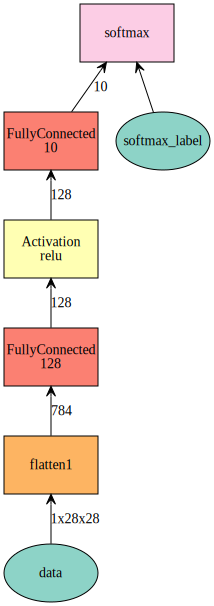

In [12]:
# Create network symbols
data = mx.sym.Variable('data')
data = mx.sym.Flatten(data=data)

fc1  = mx.sym.FullyConnected(data=data, name='fc1', num_hidden=128)
act1 = mx.sym.Activation(data=fc1, name='relu1', act_type="relu")

fc2  = mx.sym.FullyConnected(data=act1, name='fc2', num_hidden=10)
mlp  = mx.sym.SoftmaxOutput(data=fc2, name='softmax')

# We visualize the network structure with output size (the batch_size is ignored.)
shape = {"data" : (batch_size, 1, 28, 28)}
mx.viz.plot_network(symbol=mlp, shape=shape)

In [29]:
import logging

logging.getLogger().setLevel(logging.WARNING)

model = mx.module.Module(
    symbol=mlp,  # network structure
    context=mx.gpu(0)
)
opt_params = {"learning_rate":0.1}
model.fit(
    train_data=train_iter,  # training data
    eval_data=val_iter,  # validation data
    num_epoch=10,
    optimizer_params=opt_params,
    force_init=True,
    batch_end_callback=mx.callback.Speedometer(batch_size=batch_size)
)

In [30]:
import sgnht_sampler


opt_params = {'a':0.01, 'learning_rate': 6e-7}
print(opt_params)

model.optimizer_initialized=False
model.fit(
    train_data=train_iter,  # training data
    num_epoch=1000,
    optimizer_params=opt_params,
    optimizer='sgnht',
    force_rebind=True,
    force_init=True,
    batch_end_callback=mx.callback.Speedometer(batch_size=batch_size)
)

{'learning_rate': 6e-07, 'a': 0.01}
